In [42]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



In [10]:
# Now we need to read in the data
df = pd.read_csv(r'/Users/macbookpro/Desktop/DATA/movies.csv')

In [4]:
# Now let's take a look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [8]:
# Data Types for our columns

print(df.dtypes)


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [3]:
# Create correct Year column

df['yearcorrect'] = df['year'].astype(str).str[0:4]


In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1980


In [4]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [7]:
# Drop any duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [19]:
pd.set_option('display.max_rows', None)

In [9]:
df['company'].value_counts().sort_values(ascending=False)



Universal Pictures                                                 377
Warner Bros.                                                       334
Columbia Pictures                                                  332
Paramount Pictures                                                 320
Twentieth Century Fox                                              240
New Line Cinema                                                    174
Touchstone Pictures                                                132
Metro-Goldwyn-Mayer (MGM)                                          125
Walt Disney Pictures                                               123
TriStar Pictures                                                    94
Dreamworks Pictures                                                 76
Miramax                                                             74
Fox 2000 Pictures                                                   63
Orion Pictures                                                      60
Summit

In [ ]:
df.drop_duplicates()


In [ ]:
# What the most variable correlated to gross revenue ? 

# Hypothesise 1: Budget have a high correlation with gross revenue
# Hypothesise 2: Company Production have a high correlation with gross revenue



<AxesSubplot:>

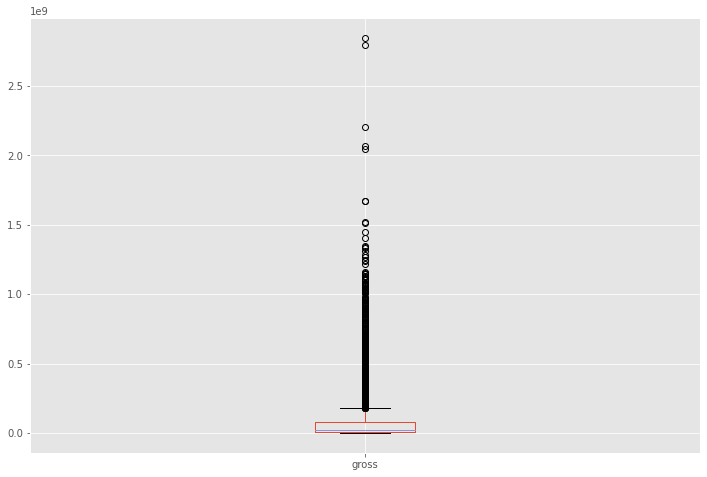

In [8]:
# Are there any Outliers?

df.boxplot(column=['gross'])


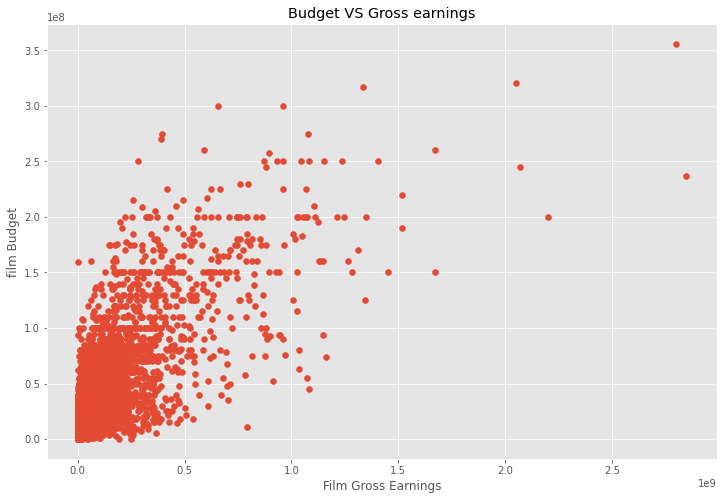

In [5]:
# Scatter plot with budget VS gross 

plt.scatter(x=df['gross'], y=df['budget'])
plt.xlabel('Film Gross Earnings')
plt.ylabel('film Budget')
plt.title('Budget VS Gross earnings')
plt.show('film Budget')


In [6]:
# Order our Data a little bit to see
df.sort_values(by=['budget'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0,2017
7066,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,Open,NaN,Drama,2019,"October 4, 2019 (United States)",7.9,73.0,Andoy Ranay,Wanggo Gallaga,JC Santos,Philippines,NaN,NaN,ABS-CBN Film Productions,105.0,2019
7641,By Light of Desert Night,NaN,Drama,2019,"March 3, 2020 (United States)",4.8,373.0,David Stuart Snell,David Stuart Snell,Alexandra Bokova,United States,NaN,NaN,Canyon Media,94.0,2019
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,2020


<AxesSubplot:xlabel='gross', ylabel='budget'>

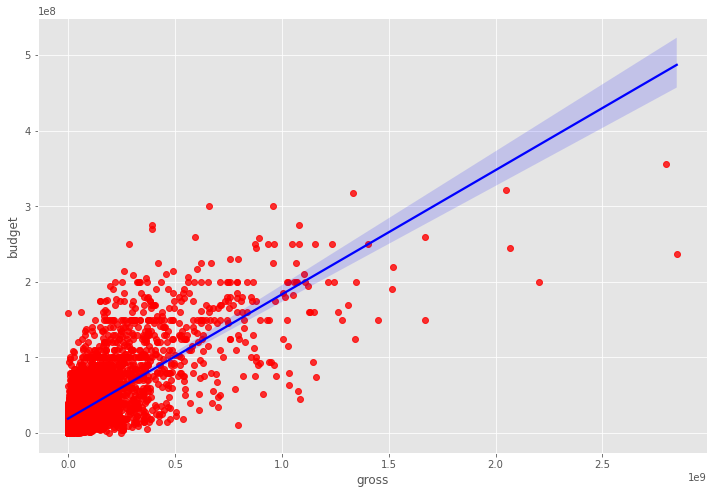

In [9]:
# Plot budget VS gross using seaborn 

sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"} )



In [12]:
# Let's start Looking at correlation

df.corr(method='kendall')  #Pearson, kendall, spearman 

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


In [ ]:
# High correlation between budget and gross
# I was right 

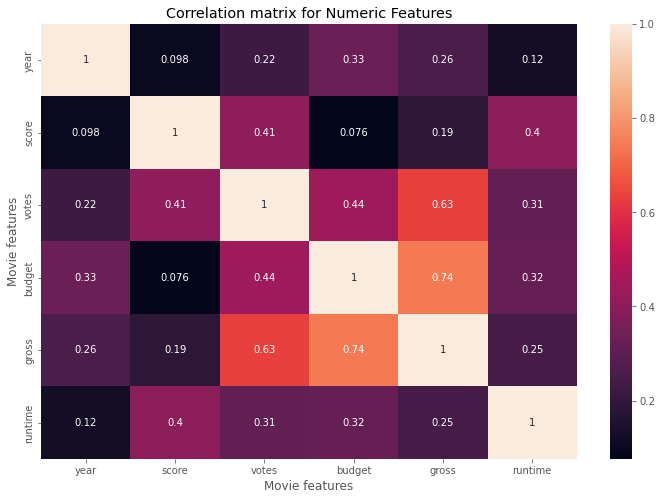

In [13]:


correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()



In [14]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,0.303922,0.138277,0.253700,0.654899,0.106870,0.595689,0.720202,0.782882,0.652837,0.190609,0.026200,0.843755,0.682841,0.071804,0.253700
rating,0.303922,1.000000,-0.012156,0.037943,0.237100,-0.065634,0.118085,0.235022,0.255885,0.243614,0.158866,0.052863,0.295403,0.278954,0.033214,0.037943
genre,0.138277,-0.012156,1.000000,0.087977,0.091299,0.063222,0.148277,0.093275,0.088035,0.097916,-0.073886,0.083745,0.122942,0.058861,0.005585,0.087977
year,0.253700,0.037943,0.087977,1.000000,0.315877,0.076737,0.326421,0.173060,0.212142,0.227367,-0.053610,0.030935,0.186974,0.121022,0.032916,1.000000
released,0.654899,0.237100,0.091299,0.315877,1.000000,0.069151,0.449956,0.502859,0.547903,0.476305,0.162029,0.016701,0.561106,0.465610,0.048243,0.315877
score,0.106870,-0.065634,0.063222,0.076737,0.069151,1.000000,0.233450,0.149505,0.103718,0.106059,-0.098456,-0.000201,0.082754,0.035989,0.035609,0.076737
votes,0.595689,0.118085,0.148277,0.326421,0.449956,0.233450,1.000000,0.495072,0.521099,0.451202,0.050641,-0.020308,0.504208,0.390436,0.067556,0.326421
director,0.720202,0.235022,0.093275,0.173060,0.502859,0.149505,0.495072,1.000000,0.696047,0.580143,0.197047,-0.031082,0.596073,0.614240,0.080107,0.173060
writer,0.782882,0.255885,0.088035,0.212142,0.547903,0.103718,0.521099,0.696047,1.000000,0.589925,0.201831,-0.010439,0.662051,0.615928,0.057742,0.212142
star,0.652837,0.243614,0.097916,0.227367,0.476305,0.106059,0.451202,0.580143,0.589925,1.000000,0.221224,-0.006390,0.516135,0.569651,0.072540,0.227367


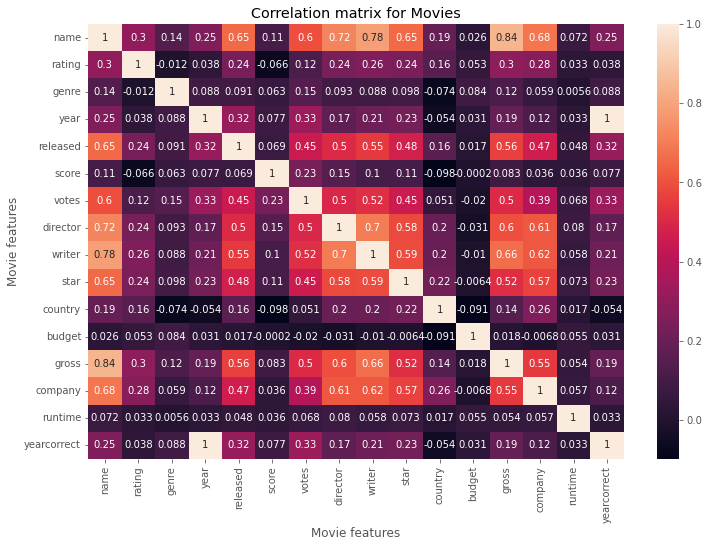

In [15]:


correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()



In [16]:


correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)



name         name           1.000000
             rating         0.303922
             genre          0.138277
             year           0.253700
             released       0.654899
                              ...   
yearcorrect  budget         0.030935
             gross          0.186974
             company        0.121022
             runtime        0.032916
             yearcorrect    1.000000
Length: 256, dtype: float64


In [17]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

score        country       -0.098456
country      score         -0.098456
budget       country       -0.091056
country      budget        -0.091056
genre        country       -0.073886
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64


In [20]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)


released     director       0.502859
director     released       0.502859
votes        gross          0.504208
gross        votes          0.504208
             star           0.516135
star         gross          0.516135
writer       votes          0.521099
votes        writer         0.521099
writer       released       0.547903
released     writer         0.547903
gross        company        0.548719
company      gross          0.548719
released     gross          0.561106
gross        released       0.561106
company      star           0.569651
star         company        0.569651
             director       0.580143
director     star           0.580143
star         writer         0.589925
writer       star           0.589925
votes        name           0.595689
name         votes          0.595689
gross        director       0.596073
director     gross          0.596073
company      director       0.614240
director     company        0.614240
writer       company        0.615928
c

In [12]:
# Looking at the top 15 companies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted


company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

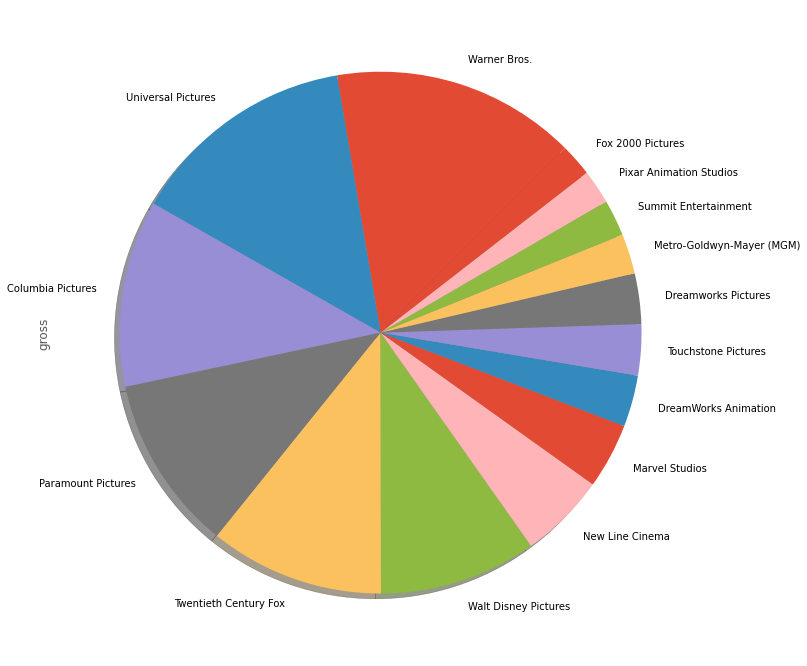

In [56]:
# Plot gross revenue by top 15 companies


plot1 = CompanyGrossSumSorted.plot.pie(y='gross', startangle = 45, shadow = True, figsize=(12, 12))
#plt.legend()
plt.show() 



In [58]:
# Looking at the top 15 companies by budget 

CompanyBudgetSum = df.groupby('company')[["budget"]].sum()

CompanyBudgetSumSorted = CompanyBudgetSum.sort_values('budget', ascending = False)[:15]

CompanyBudgetSumSorted = CompanyBudgetSumSorted['budget'].astype('int64') 

CompanyBudgetSumSorted

company
Warner Bros.                 19568300000
Universal Pictures           15989730001
Columbia Pictures            15512107000
Paramount Pictures           13723450000
Twentieth Century Fox        11474600000
Walt Disney Pictures         10404700000
New Line Cinema               5648200000
Touchstone Pictures           4153700000
Dreamworks Pictures           3961700000
Metro-Goldwyn-Mayer (MGM)     3548250000
DreamWorks Animation          3344000000
Marvel Studios                2664000000
Summit Entertainment          2655269000
Fox 2000 Pictures             2329500000
TriStar Pictures              2089965000
Name: budget, dtype: int64

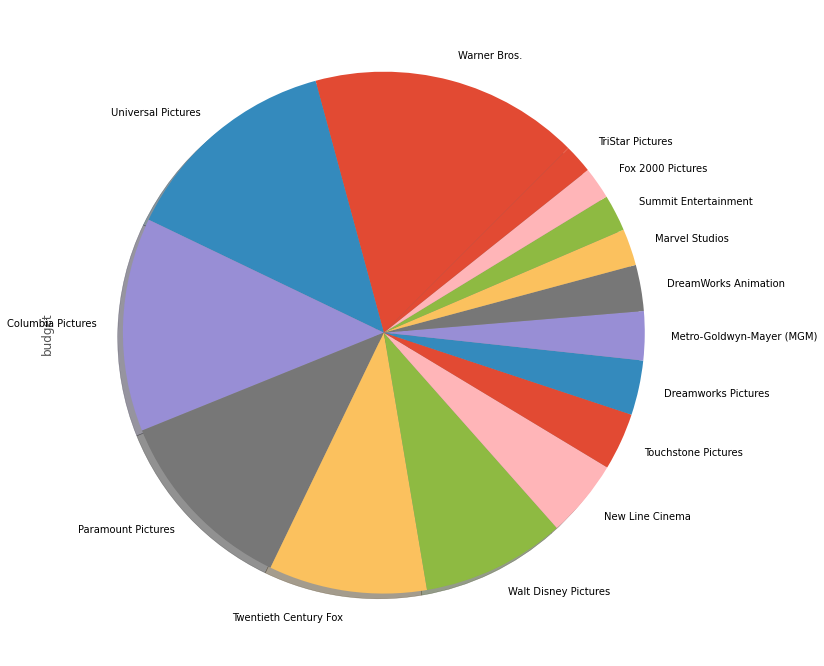

In [59]:
# Plot budget revenue by top 15 companies

plot1 = CompanyBudgetSumSorted.plot.pie(y='budget', startangle = 45, shadow = True, figsize=(12, 12))
#plt.legend()
plt.show() 



In [ ]:
# Summary 
# Votes and budget have the highest correlation to gross earnings 

